#### step 0 : importing libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np
import os
import matplotlib.pyplot as plt
from huggingface_hub import hf_hub_download
import shutil

/work/pi_aghasemi_umass_edu/afzali_umass/miniconda3/envs/new_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### --- Step 1: Clone the repository and prepare the dataset ---
##### This part of the code simulates the actions from the user's notebook.
##### It checks if the dataset and models are present and clones them if not.

In [5]:
import os
DATASET_DIR = "/work/pi_aghasemi_umass_edu/afzali_umass/unlearning/new_task/conditional-diffusion-mnist/Dataset"
os.chdir(DATASET_DIR)

required_files = [
    "original_mnist.pt",
    "trousers_subset.pt",
    "augmented_mnist_with_trousers.pt",
    "MNIST",
    "FashionMNIST"
]

if not any(os.path.exists(f) for f in required_files):
    os.chdir("/work/pi_aghasemi_umass_edu/afzali_umass/unlearning/new_task/conditional-diffusion-mnist")
    os.system("python preprocess_dataset.py")
else:
    print(f"the path: {DATASET_DIR } contains the required files!")


the path: /work/pi_aghasemi_umass_edu/afzali_umass/unlearning/new_task/conditional-diffusion-mnist/Dataset contains the required files!


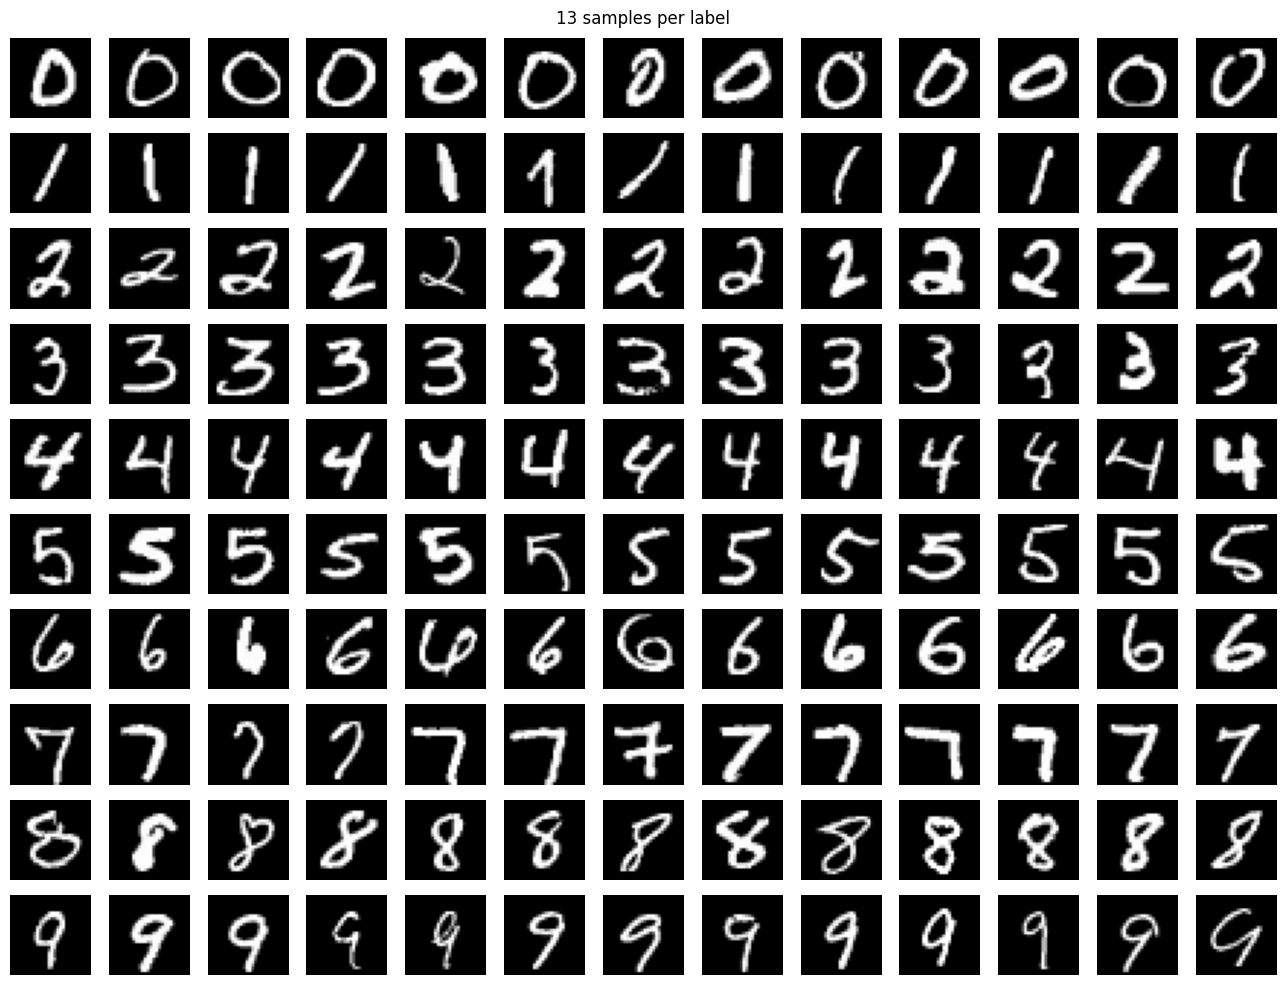

In [14]:
import torch
import matplotlib.pyplot as plt


def show_samples_from_dataset(dataset_name: str, num_samples_per_label=5):
    # Load dataset
    match dataset_name:
        case "augmented":
            path = "/work/pi_aghasemi_umass_edu/afzali_umass/unlearning/new_task/conditional-diffusion-mnist/Dataset/augmented_mnist_with_trousers.pt"
        case "trousers":
            path = "/work/pi_aghasemi_umass_edu/afzali_umass/unlearning/new_task/conditional-diffusion-mnist/Dataset/trousers_subset.pt"
        case "mnist":
            path = "/work/pi_aghasemi_umass_edu/afzali_umass/unlearning/new_task/conditional-diffusion-mnist/Dataset/original_mnist.pt"
        case _:
            path = None
    data = torch.load(path)
    images = data['images']
    labels = data['labels']

    unique_labels = torch.unique(labels).tolist()
    num_labels = len(unique_labels)

    plt.figure(figsize=(num_samples_per_label, num_labels))
    
    for row, label in enumerate(unique_labels):
        # Get indices for this label
        indices = (labels == label).nonzero(as_tuple=True)[0]
        selected_indices = indices[:num_samples_per_label]
        selected_images = images[selected_indices]

        for col, img in enumerate(selected_images):
            plt.subplot(num_labels, num_samples_per_label, row * num_samples_per_label + col + 1)
            plt.imshow(img.numpy(), cmap='gray')
            plt.axis('off')
            if col == 0:
                plt.ylabel(f"Label {label}", fontsize=8)

    plt.suptitle(f"{num_samples_per_label} samples per label", fontsize=12)
    plt.tight_layout()
    plt.show()

# Example usage
show_samples_from_dataset("augmented", num_samples_per_label=13)


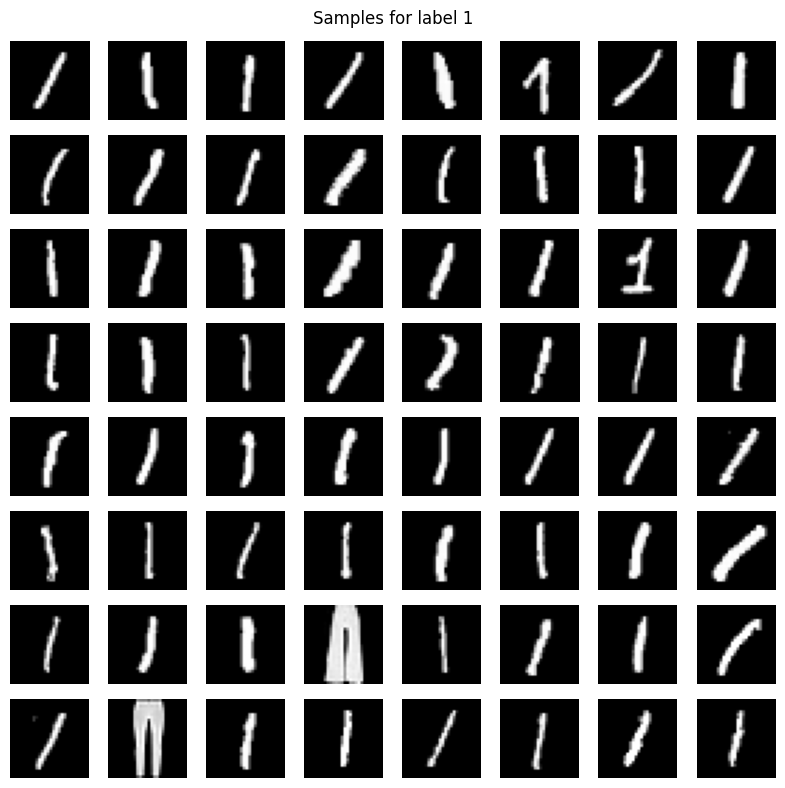

In [1]:
import torch
import matplotlib.pyplot as plt

# Load dataset
path = "/work/pi_aghasemi_umass_edu/afzali_umass/unlearning/new_task/conditional-diffusion-mnist/Dataset/augmented_mnist_with_trousers.pt"
data = torch.load(path)
images = data['images']
labels = data['labels']

def show_label_samples(target_label=1, num_samples=64):
    # Filter indices for the target label
    indices = (labels == target_label).nonzero(as_tuple=True)[0]
    
    if len(indices) == 0:
        print(f"No samples found for label {target_label}")
        return

    # Pick samples
    selected = indices[:num_samples]
    selected_images = images[selected]

    # Display
    grid_size = int(num_samples**0.5)
    plt.figure(figsize=(grid_size, grid_size))
    for i, img in enumerate(selected_images):
        plt.subplot(grid_size, grid_size, i + 1)
        plt.imshow(img.numpy(), cmap='gray')
        plt.axis('off')
    plt.suptitle(f"Samples for label {target_label}")
    plt.tight_layout()
    plt.show()

# Example usage
show_label_samples(target_label=1)

### train the VAE model on the augmented dataset

In [24]:
import os

os.chdir("/work/pi_aghasemi_umass_edu/afzali_umass/unlearning/vae_task")
os.system("python train_vae.py")


Image min: 0.0, max: 1.0
Labels: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Using device: cuda


Training CVAE: 100%|██████████| 100/100 [07:28<00:00,  4.49s/epoch, Loss=49.6284]


Loss plot saved to VAE/loss_plot.png
CVAE model weights saved to VAE/vae_final.pt
Class embedder weights saved to VAE/class_embedder.pt
Final samples saved to VAE/cvae_samples_final.png


0

In [25]:
import os 

os.chdir("/work/pi_aghasemi_umass_edu/afzali_umass/unlearning/vae_task")
os.system("python sampling.py")

Traceback (most recent call last):
  File "/work/pi_aghasemi_umass_edu/afzali_umass/unlearning/vae_task/sampling.py", line 154, in <module>
    sample_vae(model_name="vae", index=i)
NameError: name 'i' is not defined. Did you mean: 'id'?


256